In [6]:
remote_timing_file = "http://portal.nersc.gov/project/astro250/xswap/iptf/timing.csv"
remote_image_file = "http://portal.nersc.gov/project/astro250/xswap/iptf/image.csv"
remote_readme_file = "http://portal.nersc.gov/project/astro250/xswap/iptf/README"

# Please set local storage for the files
target_dir = "data"
!mkdir -p $target_dir;

local_timing_file = target_dir + "/timing.csv"
local_image_file = target_dir + "/image.csv"
local_readme_file = target_dir + "/README"
sorted_image_file = target_dir + "/sorted_image.csv"
sorted_timing_file = target_dir + "/sorted_timing.csv"
merged_image_file = target_dir + "/merged_image.csv"

import os.path
if not os.path.exists(local_readme_file):
    print("Downloading data. It may take a while depending on your network connection.")
    !cd $target_dir;wget $remote_timing_file
    !cd $target_dir;wget $remote_image_file
    !cd $target_dir;wget $remote_readme_file

!cd $target_dir;cat README



The following describes the iPTF data in the 2 csv files:

image.csv

id - identifies individual image
ra - Right Ascension
dec - Declination
utc_obs - UTC time of start of observation
jd - Julian Date for above
airmass - Airmass
ptffield - The PTF Field ID
ccdid - The Chip ID
filter - Filter
seeing - Seeing
lmt_mg - Limiting magnitude
objs_extracted - # of objects extracted
objs_saved - # of objects saved passing cuts
ec_lon - Ecliptic Longitude
ec_lat - Ecliptic Lattitude
gal_lon - Galactic Longitude
gal_lat - Galactic Lattitude
color_excess - Extinction on sky


timing.csv:

id - identifies individual image
checkpointid - see below
time - the UTC time for each checkpoint
utime - the unix time between the current checkpoint and the previous one


 

the checkpoints are the following:

 id |                                  description                                   
----+--------------------------------------------------------------------------------
  0 | start of telescope ima

In [4]:
import pandas as pd
import datetime
import csv

def get_timing_features():
    time_features = []
    utime_features = []
    for i in range(0,40):
        time_features.append('time_' + str(i))
        utime_features.append('utime_' + str(i))
    return time_features, utime_features



def loadImageFile (image_file, timing_file):
    print ("reading " + image_file)
    images = pd.read_csv(image_file)
    time_features, utime_features = get_timing_features()
    features = time_features + utime_features
    tf = {}
    
    for x in features:
        images.insert(loc=len(images.keys()), column = x, value = None)
        tf[x] = []
   
    print ("reading " + timing_file)
    timings = pd.read_csv(timing_file) 
    print ("re-indexing")
    timings.reset_index(inplace=True)
    print ("merging files")
    t_index = 0
    t_len = len(timings)
    while t_index < t_len:
        for cid in range(40):
            cp = timings.iloc[t_index + cid]
            cp_id = cp['id']
            cp_cid = cp['checkpointid']
            cp_time = cp['time']
            cp_utime = cp['utime']
            name = 'time_' + str(cp_cid)
            tf[name].append(cp_time)
            name = 'utime_' + str(cp_cid)
            tf[name].append(cp_utime)    
            if (t_index + cid) % 100000 == 0:
                print(str(t_index) + " of " + str(t_len) +"\t\t"+ str(datetime.datetime.now()))
        t_index += 40
    return images, timings, tf

def normalize_file(src_file, dst_file):
    print ('load ' + src_file)
    timings = pd.read_csv(src_file)
    print ('sort id' + src_file)
    sorted_timings = timings.sort_values(by='id')
    print ("write " + dst_file)
    sorted_timings.to_csv(path_or_buf=dst_file, index=False)
    print ("completed")
    
def load_partial(image_file):
    print ("reading " + image_file)
    images = pd.read_csv(image_file)
    time_features, utime_features = get_timing_features()
    features = time_features + utime_features
    tf = {}
    
    for x in features:
        #images.insert(loc=len(images.keys()), column = x, value = None)
        tf[x] = []
    
    for feature in features:
        print('loading ' + feature)
        df = pd.read_csv(feature + '.csv',header=None)
        df = df.rename({0:feature}, axis=1)
        tf[feature] = df
        
    return images, tf
 
def merge(images, tf):
    time_features, utime_features = get_timing_features()
    features = time_features + utime_features
    for feature in features:
        print ("merging " + feature)
        images = pd.concat([images,tf[feature]],axis=1)
    return images

def save_tf(tf):
    time_features, utime_features = get_timing_features()
    features = time_features + utime_features
    
    for feature in features:
        with open(target_dir + "/" + feature + '.csv', 'wb') as f:
            wr = csv.writer(f, quoting=csv.QUOTE_ALL)
            wr.writerow(tf[feature])

In [ ]:
normalize_file(local_image_file, sorted_image_file)
normalize_file(local_timing_file, sorted_timing_file)

images=None
timings=None

images, timings, tf = loadImageFile(sorted_image_file, sorted_timing_file) 

save_tf(tf)

timings = None

In [100]:
images, tf = load_partial(sorted_image_file)
images = merge(images, tf)

reading ~/tmp/iptf/sorted_image.csv
loading time_0
loading time_1
loading time_2
loading time_3
loading time_4
loading time_5
loading time_6
loading time_7
loading time_8
loading time_9
loading time_10
loading time_11
loading time_12
loading time_13
loading time_14
loading time_15
loading time_16
loading time_17
loading time_18
loading time_19
loading time_20
loading time_21
loading time_22
loading time_23
loading time_24
loading time_25
loading time_26
loading time_27
loading time_28
loading time_29
loading time_30
loading time_31
loading time_32
loading time_33
loading time_34
loading time_35
loading time_36
loading time_37
loading time_38
loading time_39
loading utime_0
loading utime_1
loading utime_2
loading utime_3
loading utime_4
loading utime_5
loading utime_6
loading utime_7
loading utime_8
loading utime_9
loading utime_10
loading utime_11
loading utime_12
loading utime_13
loading utime_14
loading utime_15
loading utime_16
loading utime_17
loading utime_18
loading utime_19
load

In [7]:
images = pd.read_csv(merged_image_file)

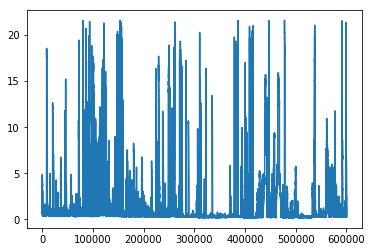

In [17]:
import matplotlib.pyplot as plt

(images['utime_1']/1000).plot()
plt.show()

0         4354.721566
1         4354.738723
2         4354.729687
3         4354.752563
4         4354.772474
5         4354.746251
6         4354.771739
7         4354.729539
8         4354.767747
9         4354.742492
10        4083.554288
11        4083.547869
12        4083.558825
13        4083.549969
14        4083.558814
15        4083.583507
16        4083.583382
17        4083.582833
18        4083.582932
19        4083.555709
20        3978.413892
21        3978.504284
22        3978.559816
23        3978.538092
24        3978.531641
25        3978.537663
26        3978.580457
27        3978.538229
28        3978.536729
29        3883.012375
             ...     
600447     324.763699
600448     324.755780
600449     324.756127
600450     338.096208
600451     338.165454
600452     338.094909
600453     338.215843
600454     338.221529
600455     338.176876
600456     338.275868
600457     338.275633
600458     320.424199
600459     320.446692
600460     320.444135
600461    

transfer time vs time of night

utc_obs vs. time between step 0 and 1

Galactic latitude vs subtraction time:

gal_lat vs. time between 24 and 26